<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Загрузка-библиотек" data-toc-modified-id="Загрузка-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка библиотек</a></span></li><li><span><a href="#Настройка-основных-параметров-визуализации" data-toc-modified-id="Настройка-основных-параметров-визуализации-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Настройка основных параметров визуализации</a></span></li><li><span><a href="#Загрузка-и-предварительный-анализ-датасета" data-toc-modified-id="Загрузка-и-предварительный-анализ-датасета-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Загрузка и предварительный анализ датасета</a></span></li></ul></li><li><span><a href="#Визуализация-данных" data-toc-modified-id="Визуализация-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Визуализация данных</a></span><ul class="toc-item"><li><span><a href="#Ящик-с-усами---boxplot" data-toc-modified-id="Ящик-с-усами---boxplot-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Ящик с усами - boxplot</a></span></li><li><span><a href="#Частотная-гистограмма" data-toc-modified-id="Частотная-гистограмма-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Частотная гистограмма</a></span></li><li><span><a href="#Парная-диаграмма---pairplot" data-toc-modified-id="Парная-диаграмма---pairplot-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Парная диаграмма - pairplot</a></span></li><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Линейная регрессия</a></span></li><li><span><a href="#Столбчатые-диаграммы---barplot" data-toc-modified-id="Столбчатые-диаграммы---barplot-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Столбчатые диаграммы - barplot</a></span></li><li><span><a href="#Тепловая-карта---heatmap" data-toc-modified-id="Тепловая-карта---heatmap-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Тепловая карта - heatmap</a></span></li></ul></li></ul></div>

# Подготовка

## Загрузка библиотек

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import rcParams, rcParamsDefault
import seaborn as sns
import numpy as np

## Настройка основных параметров визуализации

In [2]:
rcParams['figure.figsize'] = 10,5
%config InlineBackend.figure_format = 'svg' 
%matplotlib inline
sns.set_style("darkgrid")
# sns.set_style("whitegrid")

pd.set_option("display.max_rows", 10)
pd.set_option("display.max_columns", 10)
pd.set_option("display.precision", 2)
pd.set_option("mode.chained_assignment", 'raise')

## Загрузка и предварительный анализ датасета

In [3]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [4]:
df = sns.load_dataset('tips')

In [5]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [7]:
df.describe()

,total_bill,tip,size
count,244.00,244.00,244.00
mean,19.79,3.00,2.57
std,8.90,1.38,0.95
min,3.07,1.00,1.00
25%,13.35,2.00,2.00
50%,17.80,2.90,2.00
75%,24.13,3.56,3.00
max,50.81,10.00,6.00


In [10]:
df.select_dtypes('number').columns

Index(['total_bill', 'tip', 'size'], dtype='object')

# Визуализация данных

## Ящик с усами - boxplot

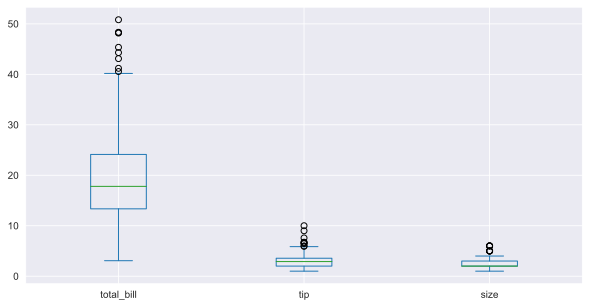

In [11]:
# визуализация pandas

df.plot(kind='box')
plt.show()

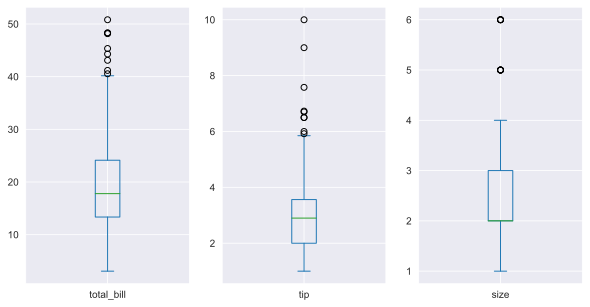

In [17]:
df.plot(kind='box', subplots=True)
plt.show()

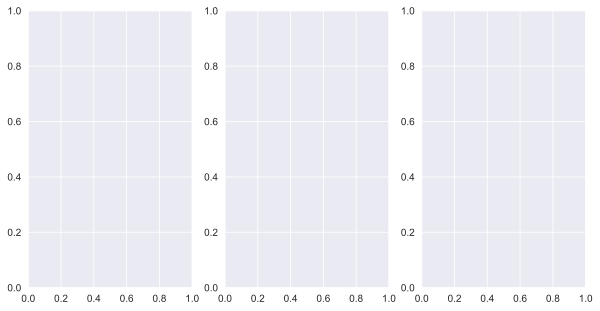

In [19]:
# визуализация matplotlib



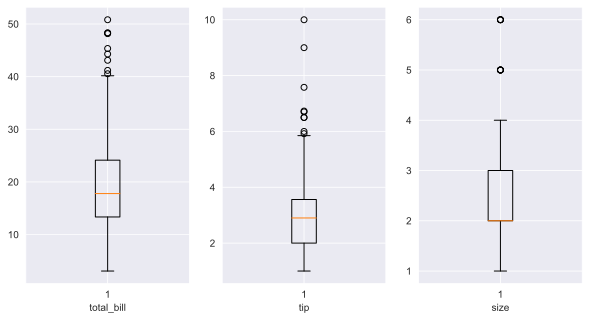

In [22]:
fig, axes = plt.subplots(1, 3)

for idx, column in enumerate(df.select_dtypes('number').columns):
    axes[idx].boxplot(df[column])
    axes[idx].set_xlabel(column)
plt.show()

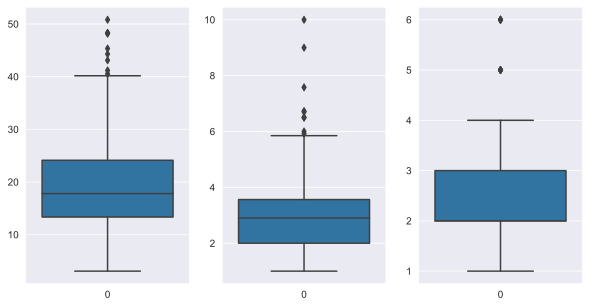

In [23]:
# визуализация seaborn

fig, axes = plt.subplots(1, 3)

for idx, column in enumerate(df.select_dtypes('number').columns):
    sns.boxplot(data=df[column], ax=axes[idx])
#     axes[idx].set_xlabel(column)
plt.show()

## Частотная гистограмма

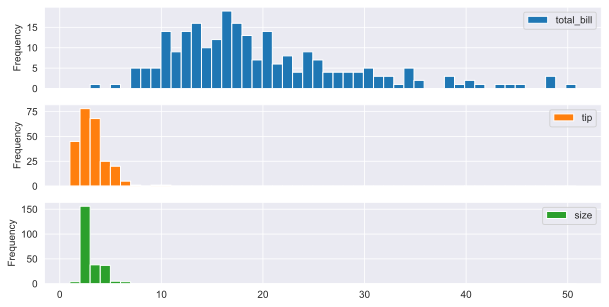

In [26]:
df.plot(kind='hist',bins=50, subplots=True) #subplots=True
plt.show()

## Парная диаграмма - pairplot

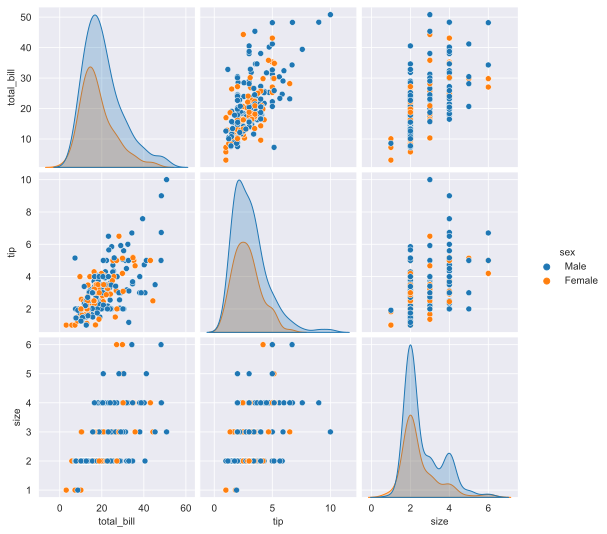

In [28]:
sns.pairplot(df,  hue='sex')

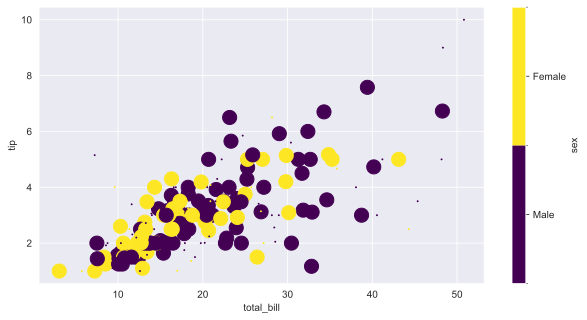

In [31]:
# зависимость общего счета от чаевых

df.plot(kind='scatter',
        x='total_bill',
        y='tip',
        c='sex',
        colormap='viridis',
       s='size',
       sizes=(1,200)

)  #c='sex', colormap='viridis', s='size', sizes=(1,200)
plt.show()

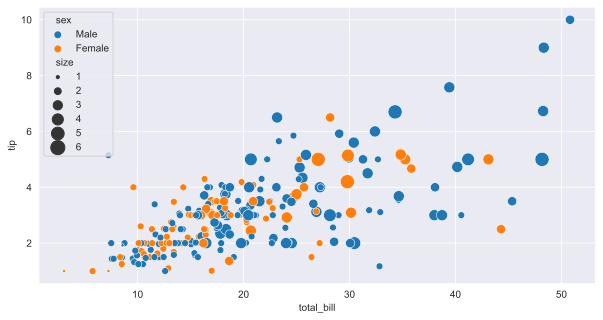

In [33]:
_ = sns.scatterplot(data=df,
                x='total_bill',
                y='tip',
                hue='sex',
                size='size',
                sizes=(10, 200))

## Линейная регрессия

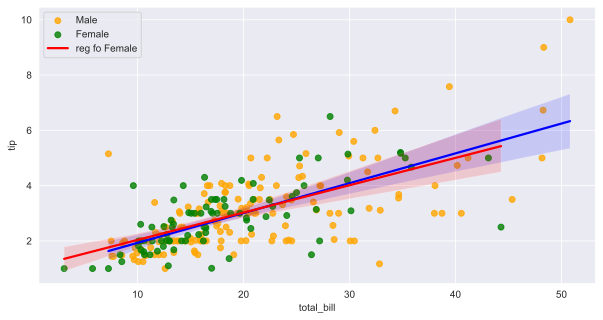

In [35]:
# корреляция зависмимости

sns.regplot(data=df[df['sex'] == 'Male'],
            x='total_bill',
            y='tip',
            color='orange',
            line_kws={'color': 'blue'},
            label='Male')
sns.regplot(data=df[df['sex'] == 'Female'],
            x='total_bill',
            y='tip',
            color='green',
            line_kws={
                'color': 'red',
                'label': 'reg fo Female'
            },
            label='Female')
_ = plt.legend()

## Столбчатые диаграммы - barplot

In [36]:
# группировка по дням

df.groupby(['day']).sum()

,total_bill,tip,size
day,,,
Thur,1096.33,171.83,152
Fri,325.88,51.96,40
Sat,1778.40,260.40,219
Sun,1627.16,247.39,216


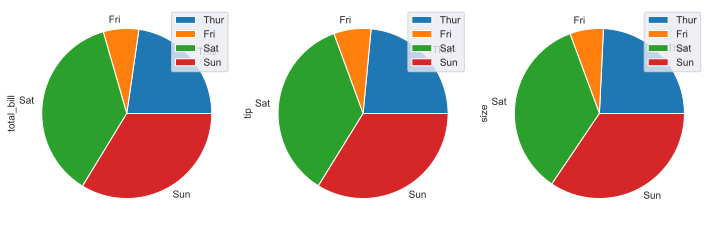

In [38]:
df.groupby(['day']).sum().plot(kind='pie', subplots=True) #
plt.tight_layout()

In [41]:
# группировка по полу
df.groupby(['sex']).sum()

,total_bill,tip,size
sex,,,
Male,3256.82,485.07,413
Female,1570.95,246.51,214


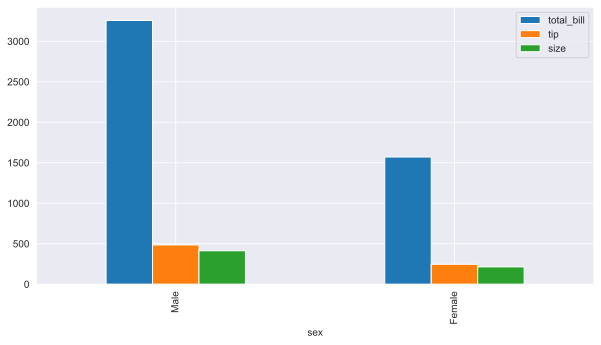

In [42]:
_ = df.groupby(['sex']).sum().plot(kind='bar')

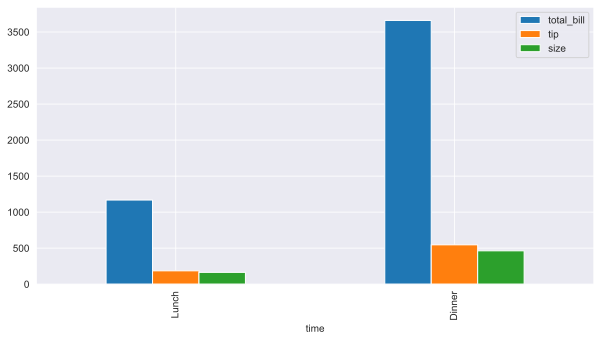

In [43]:
# группировка по типу трапезы

_ = df.groupby(['time']).sum().plot(kind='bar')

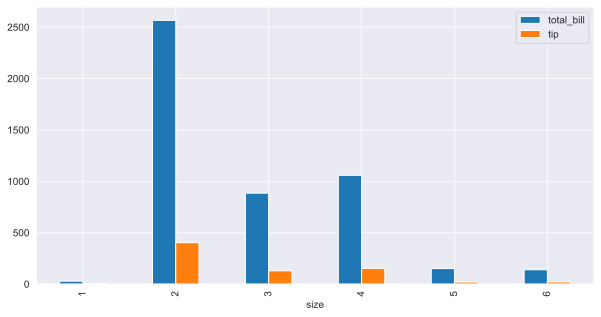

In [44]:
# группировка по кол-ву гостей
_ = df.groupby(['size']).sum().plot(kind='bar')

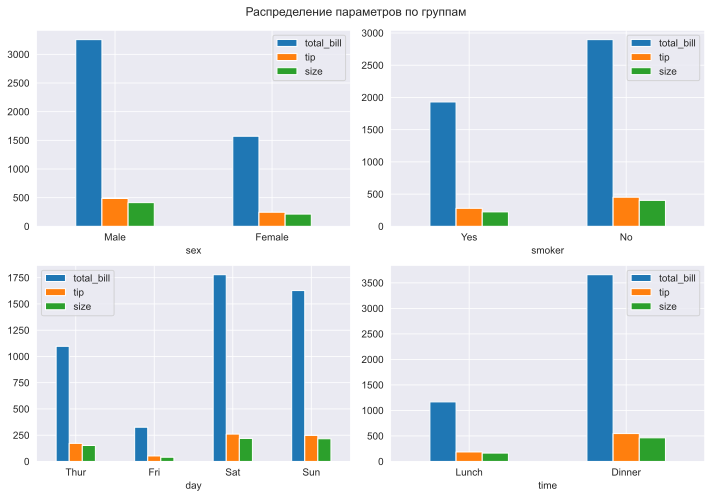

In [47]:
fig, axes = plt.subplots(2, 2, figsize=(10, 7))
axes = axes.flatten()

for ax, column in zip(axes, df.select_dtypes('category').columns):
    df.groupby(column).sum().plot(kind='bar', ax=ax, rot=0)
    ax.set_xlabel(column)

fig.suptitle('Распределение параметров по группам')
plt.tight_layout()
plt.show()

## Тепловая карта - heatmap

In [48]:
# матрица корреляции
corr = df.corr()
corr

,total_bill,tip,size
total_bill,1.00,0.68,0.60
tip,0.68,1.00,0.49
size,0.60,0.49,1.00


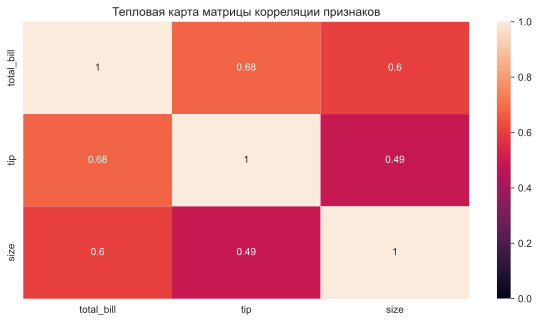

In [49]:
sns.heatmap(corr, annot=True, vmin=0, vmax=1)
_ = plt.title('Тепловая карта матрицы корреляции признаков')